## Obdelava slik 

### 1. Uvod
V datasetu imamo 28373 shranjene glasbe. Za vsako imamo skranjenega autorja, ime glasbe, leto objave, žanr in še nekaj numeričnih podatkov, vse skupaj 30 podatkov.

### 2. Statistika


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from csv import DictReader

In [3]:
#Pridobivanje podatkov
musics = []

reader = DictReader(open('tcc_ceds_music.csv', 'rt', encoding='utf-8'))
for row in reader:
    artist = row["artist_name"]
    name   = row["track_name"]
    date   = row["release_date"]
    genre  = row["genre"]
    len    = row["len"]
    topic  = row["topic"]
    musics.append([artist, name, date, genre, len, topic])
    

Text(0.5, 0, 'Število filmov')

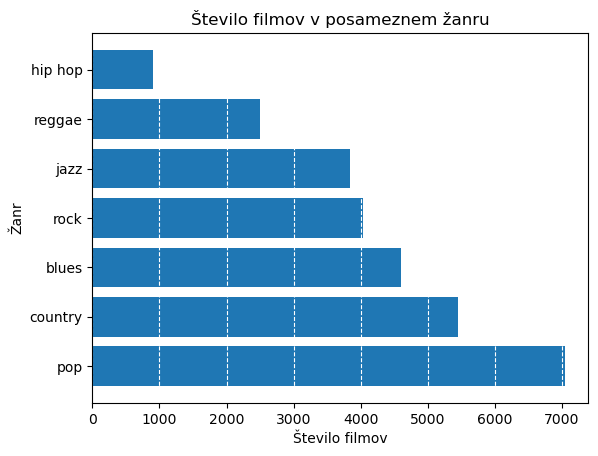

In [6]:
fig, ax = plt.subplots(1, 1)

temp = {}
for music in musics:
    if music[3] not in temp.keys():
        temp[music[3]] = 0
    temp[music[3]] += 1

temp = sorted(temp.items(), key=lambda x:x[1], reverse=True)
temp = dict(temp)

ax.xaxis.grid(color='white', linestyle='dashed')
ax.set_title("Število glasb v posameznem žanru")
ax.barh(list(temp.keys()), temp.values())
ax.set_ylabel("Žanr")
ax.set_xlabel("Število glasb")

Text(0.5, 0, 'Število glasb')

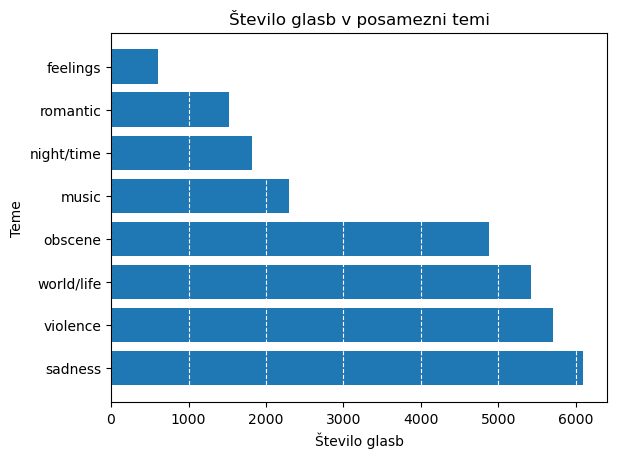

In [8]:
fig, ax = plt.subplots(1, 1)

temp = {}
for music in musics:
    if music[5] not in temp.keys():
        temp[music[5]] = 0
    temp[music[5]] += 1

temp = sorted(temp.items(), key=lambda x:x[1], reverse=True)
temp = dict(temp)

ax.xaxis.grid(color='white', linestyle='dashed')
ax.set_title("Število glasb v posamezni temi")
ax.barh(list(temp.keys()), temp.values())
ax.set_ylabel("Teme")
ax.set_xlabel("Število glasb")